In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [18]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [19]:
# Self Organized map training.......
# we will use the miniSom
!pip install MiniSom

In [20]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma = 1.0) # Sigma is the radius of the Mean Intermediate Distance
som.random_weights_init(X)
som.train_random(data = X,num_iteration = 100)

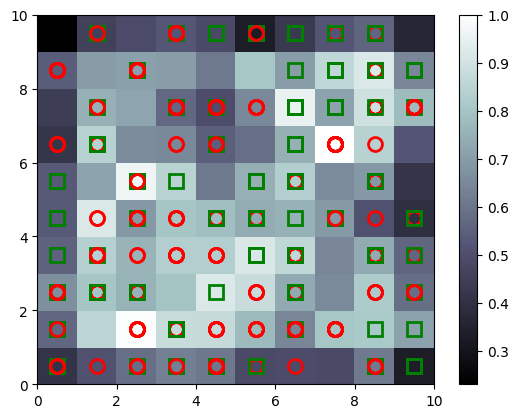

In [30]:
from pylab import bone,pcolor,colorbar,plot,show
bone()

pcolor(som.distance_map().T)
colorbar()
# White ones have large MIDs .....which are outliers / frauds
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
show()

In [33]:
mappings = som.win_map(X)

In [34]:
frauds = mappings[(8,1)]